In [ ]:
from platform import python_version

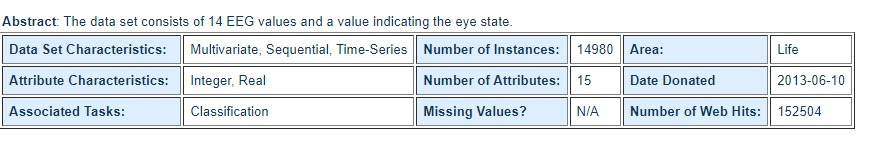



Todos os dados são de uma medição contínua de EEG com o Emotiv EEG Neuroheadset. A duração da medição foi de 117 segundos. O estado do olho foi detectado por meio de uma câmera durante a medição do EEG e adicionado posteriormente manualmente ao arquivo após a análise dos quadros de vídeo. '1' indica o estado de olho fechado e '0' o estado de olho aberto. Todos os valores estão em ordem cronológica com o primeiro valor medido na parte superior dos dados.



In [ ]:
import pandas as pd
import urllib.request
from scipy.io.arff import loadarff
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff'
resp = urllib.request.urlopen(url)
data, meta = loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.decode('UTF-8')

X, y = df.iloc[:, :5], df.iloc[:, -1]

DESCRIÇÕES DOS DADOS - DEFINIÇÕES 

In [39]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)

Valor do Intercept:  [-8.31705257e-07]
Valor dos coeficientes da Regressão Linear:  [[ 0.01104811 -0.01792678  0.01343843 -0.01061587  0.00244009]]


In [ ]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)

Valor MSE:  0.4128838451268358


Plote 3 gráficos (2D) o MSE em função do atributo intercept da classe LogisticRegression. Mantenha os valores do atributo coef fixos e varie o valor de intercept entre intercept - delta e intercept_ + delta.



1.   Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
2.   O atributo intercept da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept. Exemplo: problema com 3 classes, 9 gráficos.



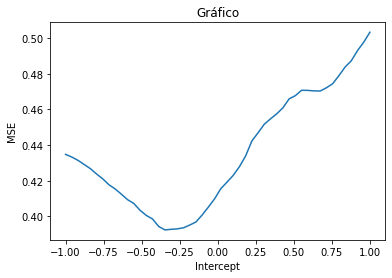

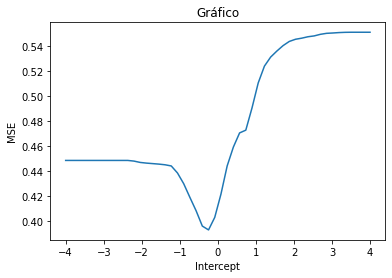

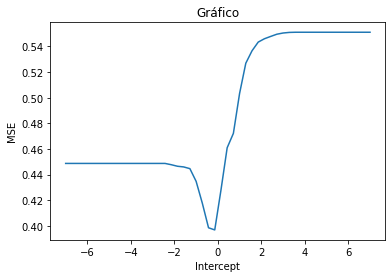

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
iteracoes = 50

for i in range(3 * modelo.intercept_.shape[0]):

    intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta, iteracoes)
    delta = delta + 3
    
    mse = []

    for i in range(iteracoes):
        modelo.intercept_ = intercept_range[i]
        ypred =  modelo.predict(X)
        mse.append(mean_squared_error(y, ypred))

    plt.title("Gráfico")
    plt.ylabel("MSE")
    plt.xlabel("Intercept")
    plt.plot(intercept_range, mse)
    plt.show()



LEITURA - WAKE DO DATASET ESCOLHIDO 

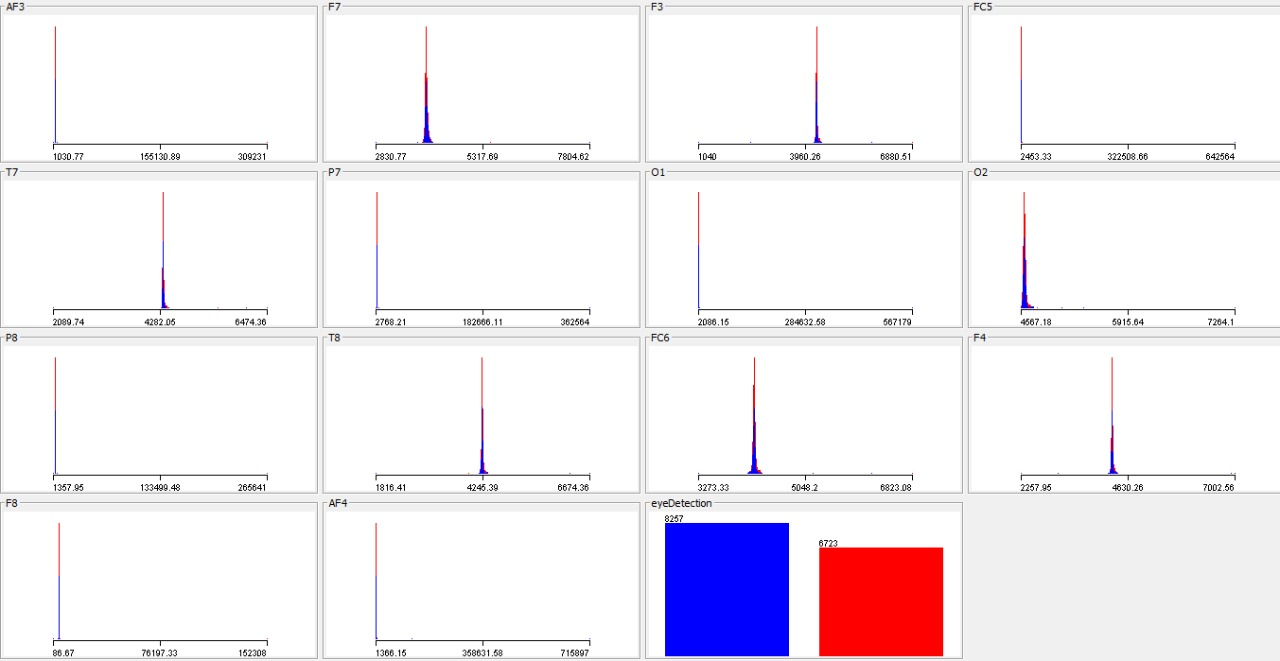

